Veriyi oku ve ilk 5 satırı görüntüle.

In [1]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Yapay Zeka Atölye/yapay_zeka_17072025/ogrenci_notlari.csv")
print(df.head())

   ogrenci_id    isim       ders  vize  final  devamsizlik
0           1  Zeynep  Matematik   NaN   31.0            7
1           2  Zeynep   Biyoloji  47.0   37.0            8
2           3   Fatma  Matematik  88.0    NaN            9
3           4    Ayşe      Fizik  96.0   49.0            4
4           5  Mehmet      Fizik  75.0   93.0            4


Eksik notları tespit et ve ortalama ile doldur.

In [2]:
print(df.isna().sum())

ogrenci_id     0
isim           0
ders           0
vize           3
final          7
devamsizlik    0
dtype: int64


In [4]:
vize_average = df['vize'].mean()
print(vize_average)
df['vize'] = df['vize'].fillna(vize_average)
print(df["vize"])

60.89690721649484
0     60.896907
1     47.000000
2     88.000000
3     96.000000
4     75.000000
        ...    
95    37.000000
96    91.000000
97    57.000000
98    95.000000
99    46.000000
Name: vize, Length: 100, dtype: float64


In [6]:
final_average = df['final'].mean()
print(final_average)
df['final'] = df['final'].fillna(final_average)
print(df["final"])

64.56989247311827
0     31.000000
1     37.000000
2     64.569892
3     49.000000
4     93.000000
        ...    
95    33.000000
96    79.000000
97    63.000000
98    64.000000
99    93.000000
Name: final, Length: 100, dtype: float64


In [7]:
print(df.isna().sum())

ogrenci_id     0
isim           0
ders           0
vize           0
final          0
devamsizlik    0
dtype: int64


Başarı notu hesapla: Vize %40, Final %60

In [8]:
df["basarı_notu"] = df["vize"] * 0.4 + df["final"] * 0.6
print(df["basarı_notu"])

0     42.958763
1     41.000000
2     73.941935
3     67.800000
4     85.800000
        ...    
95    34.600000
96    83.800000
97    60.600000
98    76.400000
99    74.200000
Name: basarı_notu, Length: 100, dtype: float64


Geçti/Kaldı sınıflandırması yap. Notu 50 ve üzeri olanlar geçti.

In [9]:
df["durum"] = df["basarı_notu"].apply(lambda x: "Geçti" if x >= 50 else "Kaldı")
print(df["durum"])

0     Kaldı
1     Kaldı
2     Geçti
3     Geçti
4     Geçti
      ...  
95    Kaldı
96    Geçti
97    Geçti
98    Geçti
99    Geçti
Name: durum, Length: 100, dtype: object


 Her ders için ortalama başarıyı hesapla ve bar grafikle göster

<Axes: xlabel='ders'>

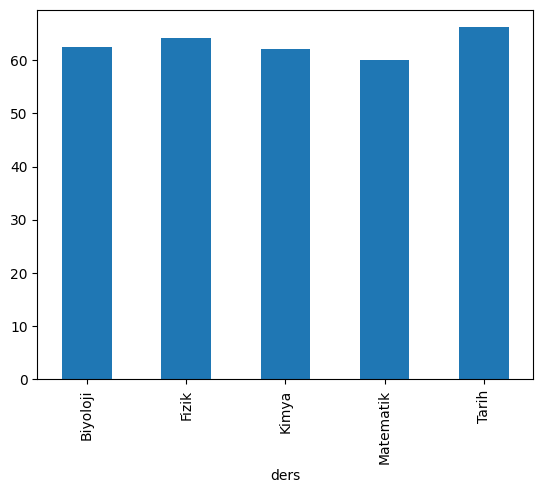

In [12]:
df.groupby("ders")["basarı_notu"].mean().plot(kind="bar")

Devamsızlık dağılımını histogram grafiği ile çiz.


<Axes: ylabel='Frequency'>

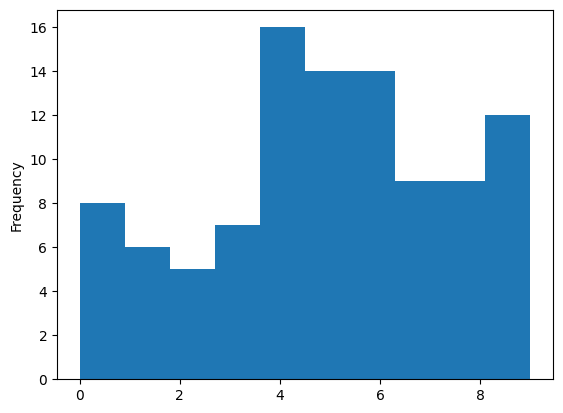

In [14]:
df["devamsizlik"].plot(kind="hist")

 Yorum yap:

*   En düşük başarı hangi derste?
*   Devamsızlık başarıyı etkiliyor mu?
*   Sınıfta kaç kişi geçti/kaldı?

In [15]:
gecme_durumu = df["durum"].value_counts()
print(gecme_durumu)

durum
Geçti    83
Kaldı    17
Name: count, dtype: int64
